In [1]:
#Import libraries
import numpy as np 
import pandas as pd 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#panda setting
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 20) # Setting pandas to display a N number rows
pd.set_option('display.width', 100) # Setting pandas dataframe display width to N

#ignored warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# movies first 5 rows
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# credit first 5 rows
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# number of rows and columns for credits and movies dataset
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


## Data Cleansing

In [6]:
# Rename movie_id to id
credits = credits.rename(columns={"movie_id": "id"})
# Inner join movies and credits dataset
tmdb = movies.merge(credits, on="id")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# Drop unnecessary columns
tmdb = tmdb.drop(columns = ['homepage', 'title_x', 'title_y',"crew","tagline", 'status', 'spoken_languages'])
tmdb.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [8]:
import json
# Changing 'genres' column from json to string
tmdb['genres'] = tmdb['genres'].apply(json.loads)
for index,i in zip(tmdb.index, tmdb['genres']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the genre
    tmdb.loc[index, 'genres'] = str(l1)
    
# Changing 'keywords' column from json to string
tmdb['keywords'] = tmdb['keywords'].apply(json.loads)
for index,i in zip(tmdb.index, tmdb['keywords']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    tmdb.loc[index, 'keywords'] = str(l1)
    
# Changing 'production_companies' column from json to string
tmdb['production_companies'] = tmdb['production_companies'].apply(json.loads)
for index,i in zip(tmdb.index, tmdb['production_companies']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    tmdb.loc[index, 'production_companies'] = str(l1)
    
# Changing 'production_companies' column from json to string
tmdb['production_countries'] = tmdb['production_countries'].apply(json.loads)
for index,i in zip(tmdb.index, tmdb['production_countries']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    tmdb.loc[index, 'production_countries'] = str(l1)
    
# Changing 'cast' column from json to string
tmdb['cast'] = tmdb['cast'].apply(json.loads)
for index,i in zip(tmdb.index, tmdb['cast']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    tmdb.loc[index, 'cast'] = str(l1)

# Changing 'crew' column from json to string
# tmdb['crew']=tmdb['crew'].apply(json.loads)
# def director(x):
#     for i in x:
#         if i['job'] == 'Director':
#             return i['name']
        
# tmdb['crew']=tmdb['crew'].apply(director)
# tmdb.rename(columns={'crew':'director'},inplace=True)

tmdb.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."


In [9]:
# Replace single quotes with empty strings
tmdb = tmdb.replace({'\'': ''}, regex=True)
# Replace square brackets with empty strings
tmdb = tmdb.replace({'\\[|\\]': ''}, regex=True)
tmdb.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At Worlds End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


In [10]:
# Check if any duplicated
tmdb.duplicated().sum()

0

In [11]:
# format values in the columns with each word starting with a capital letter
tmdb['keywords'] = tmdb['keywords'].apply(lambda x: x.title())

# format columns values to currency
tmdb['revenue'] = tmdb['revenue'].apply(lambda x: '${:,.2f}'.format(x))
tmdb['budget'] = tmdb['budget'].apply(lambda x: '${:,.2f}'.format(x))
tmdb.head(20)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,"$237,000,000.00","Action, Adventure, Fantasy, Science Fiction",19995,"Culture Clash, Future, Space War, Space Colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,"$2,787,965,087.00",162.0,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,"$300,000,000.00","Adventure, Fantasy, Action",285,"Ocean, Drug Abuse, Exotic Island, East India T...",en,Pirates of the Caribbean: At Worlds End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,"$961,000,000.00",169.0,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,"$245,000,000.00","Action, Adventure, Crime",206647,"Spy, Based On Novel, Secret Agent, Sequel, Mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,"$880,674,609.00",148.0,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,"$250,000,000.00","Action, Crime, Drama, Thriller",49026,"Dc Comics, Crime Fighter, Terrorist, Secret Id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,"$1,084,939,099.00",165.0,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,"$260,000,000.00","Action, Adventure, Science Fiction",49529,"Based On Novel, Mars, Medallion, Space Travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,"$284,139,100.00",132.0,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
5,"$258,000,000.00","Fantasy, Action, Adventure",559,"Dual Identity, Amnesia, Sandstorm, ""Love Of On...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"Columbia Pictures, Laura Ziskin Productions, M...",United States of America,2007-05-01,"$890,871,626.00",139.0,5.9,3576,"Tobey Maguire, Kirsten Dunst, James Franco, Th..."
6,"$260,000,000.00","Animation, Family",38757,"Hostage, Magic, Horse, Fairy Tale, Musical, Pr...",en,Tangled,When the kingdoms most wanted-and most charmin...,48.681969,"Walt Disney Pictures, Walt Disney Animation St...",United States of America,2010-11-24,"$591,794,936.00",100.0,7.4,3330,"Zachary Levi, Mandy Moore, Donna Murphy, Ron P..."
7,"$280,000,000.00","Action, Adventure, Science Fiction",99861,"Marvel Comic, Sequel, Superhero, Based On Comi...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"Marvel Studios, Prime Focus, Revolution Sun St...",United States of America,2015-04-22,"$1,405,403,694.00",141.0,7.3,6767,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
8,"$250,000,000.00","Adventure, Fantasy, Family",767,"Witch, Magic, Broom, School Of Witchcraft, Wiz...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"Warner Bros., Heyday Films","United Kingdom, United States of America",2009-07-07,"$933,959,197.00",153.0,7.4,5293,"Daniel Radcliffe, Rupert Grint, Emma Watson, T..."
9,"$250,000,000.00","Action, Adventure, Fantasy",209112,"Dc Comics, Vigilante, Superhero, Based On Comi...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"DC Comics, Atlas Entertainment, Warner Bros., ...",United States of America,2016-03-23,"$873,260,194.00",151.0,5.7,7004,"Ben Affleck, Henry Cavill, Gal Gadot, Amy Adam..."


In [24]:
tmdb.isna().sum()

budget                        0
genres                        0
id                            0
keywords                      0
original_language             0
original_title                0
overview                      3
popularity                    0
production_companies          0
production_countries          0
release_date                  1
revenue                       0
runtime                       2
vote_average                  0
vote_count                    0
cast                          0
weighted_rating               0
normalized_weighted_rating    0
normalized_popularity         0
score                         0
dtype: int64

In [25]:
tmdb = tmdb.dropna()

In [26]:
tmdb.isna().sum()

budget                        0
genres                        0
id                            0
keywords                      0
original_language             0
original_title                0
overview                      0
popularity                    0
production_companies          0
production_countries          0
release_date                  0
revenue                       0
runtime                       0
vote_average                  0
vote_count                    0
cast                          0
weighted_rating               0
normalized_weighted_rating    0
normalized_popularity         0
score                         0
dtype: int64

## Movie Recommendation Based on Weighted Rating Scores (TMDB Dataset)
### W = (Rv+Cm)/(v+m)
W = Weighted Rating<br>
R = Average for the movie(0 to 10) = Rating<br>
v = Number of votes for the movie<br>
m = Minimum votes required to be listed in Top 250<br>
C = Mean vote across whole Report

In [13]:
v = tmdb['vote_count']
R = tmdb['vote_average']
C = tmdb['vote_average'].mean()
m = tmdb['vote_count'].quantile(0.70)    # Movies > 70th percentile votes

In [14]:
tmdb['weighted_rating'] = ((R*v)+(C*m))/(v+m)
tmdb.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,weighted_rating
0,"$237,000,000.00","Action, Adventure, Fantasy, Science Fiction",19995,"Culture Clash, Future, Space War, Space Colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,"$2,787,965,087.00",162.0,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.148013
1,"$300,000,000.00","Adventure, Fantasy, Action",285,"Ocean, Drug Abuse, Exotic Island, East India T...",en,Pirates of the Caribbean: At Worlds End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,"$961,000,000.00",169.0,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",6.807627
2,"$245,000,000.00","Action, Adventure, Crime",206647,"Spy, Based On Novel, Secret Agent, Sequel, Mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,"$880,674,609.00",148.0,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",6.276075
3,"$250,000,000.00","Action, Crime, Drama, Thriller",49026,"Dc Comics, Crime Fighter, Terrorist, Secret Id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,"$1,084,939,099.00",165.0,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",7.509565
4,"$260,000,000.00","Action, Adventure, Science Fiction",49529,"Based On Novel, Mars, Medallion, Space Travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,"$284,139,100.00",132.0,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",6.098319


In [15]:
sorted_ranking = tmdb.sort_values('weighted_rating', ascending=False)
sorted_ranking

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,weighted_rating
1881,"$25,000,000.00","Drama, Crime",278,"Prison, Corruption, Police Brutality, Prison C...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,Castle Rock Entertainment,United States of America,1994-09-23,"$28,341,469.00",142.0,8.5,8205,"Tim Robbins, Morgan Freeman, Bob Gunton, Clanc...",8.340775
3337,"$6,000,000.00","Drama, Crime",238,"Italy, Love At First Sight, Loss Of Father, Pa...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"Paramount Pictures, Alfran Productions",United States of America,1972-03-14,"$245,066,411.00",175.0,8.4,5893,"Marlon Brando, Al Pacino, James Caan, Richard ...",8.192887
662,"$63,000,000.00",Drama,550,"Support Group, Dual Identity, Nihilism, Rage A...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"Regency Enterprises, Fox 2000 Pictures, Taurus...","Germany, United States of America",1999-10-15,"$100,853,753.00",139.0,8.3,9413,"Edward Norton, Brad Pitt, Meat Loaf, Jared Let...",8.171648
3232,"$8,000,000.00","Thriller, Crime",680,"Transporter, Brothel, Drug Dealer, Boxer, Mass...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"Miramax Films, A Band Apart, Jersey Films",United States of America,1994-10-08,"$213,928,762.00",154.0,8.3,8428,"John Travolta, Samuel L. Jackson, Uma Thurman,...",8.157615
65,"$185,000,000.00","Drama, Action, Crime, Thriller",155,"Dc Comics, Crime Fighter, Secret Identity, Sca...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"DC Comics, Legendary Pictures, Warner Bros., D...","United Kingdom, United States of America",2008-07-16,"$1,004,558,444.00",152.0,8.2,12002,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",8.102674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,"$100,000,000.00","Action, Crime",314,"White Russian, Sex, Dc Comics, Beauty, Sexism,...",en,Catwoman,Liquidated after discovering a corporate consp...,32.271938,"Village Roadshow Pictures, DiNovi Pictures, Wa...",United States of America,2004-07-22,"$82,102,379.00",104.0,4.2,808,"Halle Berry, Benjamin Bratt, Sharon Stone, Lam...",4.991470
3746,"$4,000,000.00",Thriller,241251,"Male Nudity, Female Nudity, Sex, Adultery, Inf...",en,The Boy Next Door,A recently cheated on married woman falls for ...,24.161735,"Universal Pictures, Nuyorican Productions, Blu...",United States of America,2015-01-23,"$52,425,855.00",91.0,4.1,1022,"Jennifer Lopez, Ryan Guzman, Ian Nelson, John ...",4.822053
210,"$125,000,000.00","Action, Crime, Fantasy",415,"Double Life, Dc Comics, Dual Identity, Crime F...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"PolyGram Filmed Entertainment, Warner Bros.","United Kingdom, United States of America",1997-06-20,"$238,207,122.00",125.0,4.2,1418,"George Clooney, ""Chris ODonnell"", Arnold Schwa...",4.749951
242,"$120,000,000.00","Action, Adventure, Science Fiction",166424,"Teleportation, Transformation, Telekinesis, Po...",en,Fantastic Four,Four young outsiders teleport to a dangerous u...,38.126095,"Twentieth Century Fox Film Corporation, Marv F...",United States of America,2015-08-05,"$167,977,596.00",100.0,4.4,2278,"Miles Teller, Kate Mara, Michael B. Jordan, Ja...",4.743880


In [16]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_rating', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_rating,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindlers List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


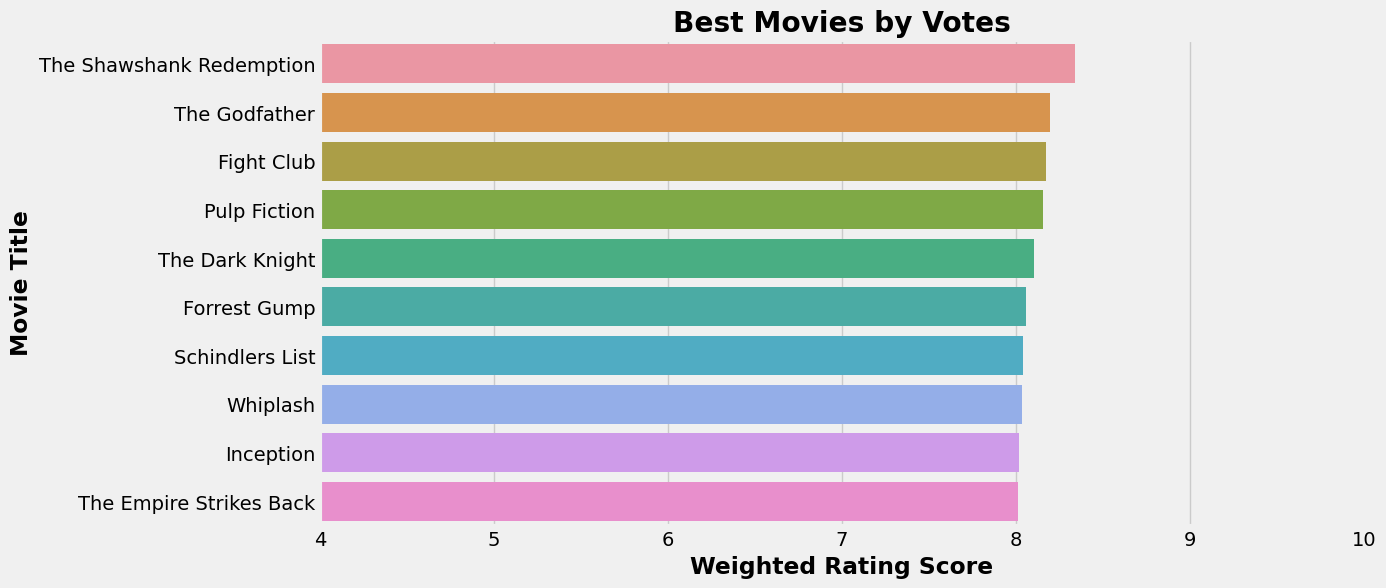

In [17]:
weight_rating = sorted_ranking.sort_values('weighted_rating', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = weight_rating['weighted_rating'].head(10), y=weight_rating['original_title'].head(10), data=weight_rating)
plt.xlim(4, 10)
plt.title("Best Movies by Votes", weight="bold")
plt.xlabel("Weighted Rating Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [18]:
popularity = sorted_ranking.sort_values('popularity', ascending=False)
popularity.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,weighted_rating
546,"$74,000,000.00","Family, Animation, Adventure, Comedy",211672,"Assistant, Aftercreditsstinger, Duringcreditss...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"Universal Pictures, Illumination Entertainment",United States of America,2015-06-17,"$1,156,730,962.00",91.0,6.4,4571,"Sandra Bullock, Jon Hamm, Michael Keaton, Alli...",6.365286
95,"$165,000,000.00","Adventure, Drama, Science Fiction",157336,"Saving The World, Artificial Intelligence, Fat...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"Paramount Pictures, Legendary Pictures, Warner...","Canada, United States of America, United Kingdom",2014-11-05,"$675,120,017.00",169.0,8.1,10867,"Matthew McConaughey, Jessica Chastain, Anne Ha...",7.998100
788,"$58,000,000.00","Action, Adventure, Comedy",293660,"Anti Hero, Mercenary, Marvel Comic, Superhero,...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"Twentieth Century Fox Film Corporation, Marvel...",United States of America,2016-02-09,"$783,112,979.00",108.0,7.4,10995,"Ryan Reynolds, Morena Baccarin, Ed Skrein, T.J...",7.334360
94,"$170,000,000.00","Action, Science Fiction, Adventure",118340,"Marvel Comic, Spaceship, Space, Outer Space, O...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"Marvel Studios, Moving Picture Company (MPC), ...","United Kingdom, United States of America",2014-07-30,"$773,328,629.00",121.0,7.9,9742,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",7.798252
127,"$150,000,000.00","Action, Adventure, Science Fiction, Thriller",76341,"Future, Chase, Post-Apocalyptic, Dystopia, Aus...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"Village Roadshow Pictures, Kennedy Miller Prod...","Australia, United States of America",2015-05-13,"$378,858,340.00",120.0,7.2,9427,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",7.135687
28,"$150,000,000.00","Action, Adventure, Science Fiction, Thriller",135397,"Monster, Dna, Tyrannosaurus Rex, Velociraptor,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"Universal Studios, Amblin Entertainment, Legen...",United States of America,2015-06-09,"$1,513,528,810.00",124.0,6.5,8662,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",6.474365
199,"$140,000,000.00","Adventure, Fantasy, Action",22,"Exotic Island, Blacksmith, East India Trading ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"Walt Disney Pictures, Jerry Bruckheimer Films",United States of America,2003-07-09,"$655,011,224.00",143.0,7.5,6985,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",7.391892
82,"$170,000,000.00","Science Fiction, Action, Drama, Thriller",119450,"Leader, Colony, Post-Apocalyptic, Dystopia, Fo...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"Ingenious Media, Chernin Entertainment, TSG En...",United States of America,2014-06-26,"$710,644,566.00",130.0,7.3,4410,"Andy Serkis, Jason Clarke, Gary Oldman, Keri R...",7.159397
200,"$125,000,000.00","Science Fiction, Adventure, Thriller",131631,"Resistance, Post-Apocalyptic, Dystopia, War, S...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"Lionsgate, Color Force",United States of America,2014-11-18,"$752,100,229.00",123.0,6.6,5584,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",6.552141
88,"$165,000,000.00","Adventure, Family, Animation, Action, Comedy",177572,"Brother Brother Relationship, Hero, Talent, Re...",en,Big Hero 6,The special bond that develops between plus-si...,203.734590,"Walt Disney Pictures, Walt Disney Animation St...",United States of America,2014-10

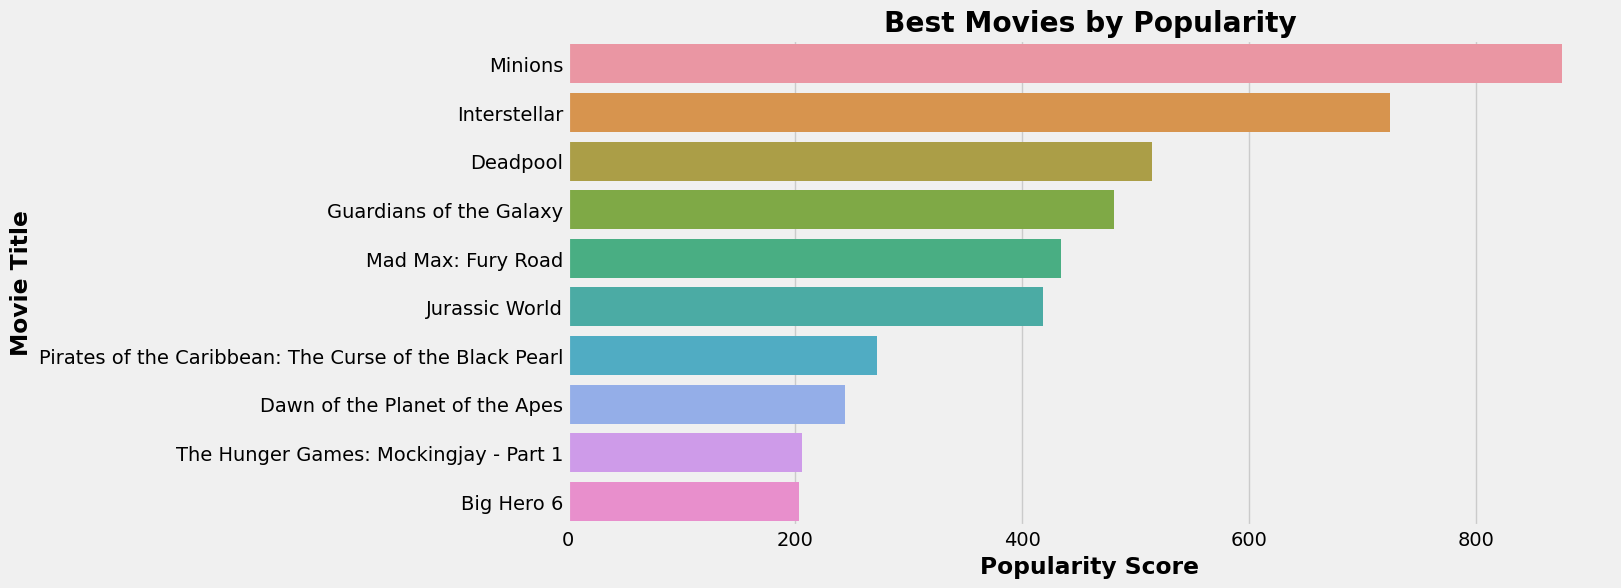

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title("Best Movies by Popularity", weight="bold")
plt.xlabel("Popularity Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

**Recommendations based on both Popularity Score and Weighted Avg(both 50% priority)**

In [20]:
# Scaling down the Popularity Score and Weighted Average due to difference in magnitude
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(tmdb[['weighted_rating', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns=['weighted_rating', 'popularity'])
movie_normalized.head()

,weighted_rating,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [21]:
# Derived 2 new column from movie_normalized which contain normalized values of weight_rating and popularity
tmdb[['normalized_weighted_rating', 'normalized_popularity']] = movie_normalized
tmdb.head(20)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,weighted_rating,normalized_weighted_rating,normalized_popularity
0,"$237,000,000.00","Action, Adventure, Fantasy, Science Fiction",19995,"Culture Clash, Future, Space War, Space Colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,"$2,787,965,087.00",162.0,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.148013,0.674339,0.171815
1,"$300,000,000.00","Adventure, Fantasy, Action",285,"Ocean, Drug Abuse, Exotic Island, East India T...",en,Pirates of the Caribbean: At Worlds End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,"$961,000,000.00",169.0,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",6.807627,0.581403,0.158846
2,"$245,000,000.00","Action, Adventure, Crime",206647,"Spy, Based On Novel, Secret Agent, Sequel, Mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,"$880,674,609.00",148.0,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",6.276075,0.436273,0.122635
3,"$250,000,000.00","Action, Crime, Drama, Thriller",49026,"Dc Comics, Crime Fighter, Terrorist, Secret Id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,"$1,084,939,099.00",165.0,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",7.509565,0.773054,0.128272
4,"$260,000,000.00","Action, Adventure, Science Fiction",49529,"Based On Novel, Mars, Medallion, Space Travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,"$284,139,100.00",132.0,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",6.098319,0.387739,0.050169
5,"$258,000,000.00","Fantasy, Action, Adventure",559,"Dual Identity, Amnesia, Sandstorm, ""Love Of On...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"Columbia Pictures, Laura Ziskin Productions, M...",United States of America,2007-05-01,"$890,871,626.00",139.0,5.9,3576,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",5.926859,0.340926,0.132141
6,"$260,000,000.00","Animation, Family",38757,"Hostage, Magic, Horse, Fairy Tale, Musical, Pr...",en,Tangled,When the kingdoms most wanted-and most charmin...,48.681969,"Walt Disney Pictures, Walt Disney Animation St...",United States of America,2010-11-24,"$591,794,936.00",100.0,7.4,3330,"Zachary Levi, Mandy Moore, Donna Murphy, Ron P...",7.205715,0.690093,0.055600
7,"$280,000,000.00","Action, Adventure, Science Fiction",99861,"Marvel Comic, Sequel, Superhero, Based On Comi...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"Marvel Studios, Prime Focus, Revolution Sun St...",United States of America,2015-04-22,"$1,405,403,694.00",141.0,7.3,6767,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",7.204498,0.689761,0.153360
8,"$250,000,000.00","Adventure, Fantasy, Family",767,"Witch, Magic, Broom, School Of Witchcraft, Wiz...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"Warner Bros., Heyday Films","United Kingdom, United States of America",2009-07-07,"$933,959,197.00",153.0,7.4,5293,"Daniel Radcliffe, Rupert Grint, Emma Watson, T...",7.270642,0.707820,0.112937
9,"$250,000,000.00","Action, Adventure, Fantasy",209112,"Dc Comics, Vigilante, Superhero, Based On Comi...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"DC Comics, Atlas Ent

In [22]:
tmdb['score'] = tmdb['normalized_weighted_rating'] * 0.5 + tmdb['normalized_popularity'] * 0.5
tmdb = tmdb.sort_values(['score'], ascending=False)
tmdb[['original_title','normalized_weighted_rating', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weighted_rating,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


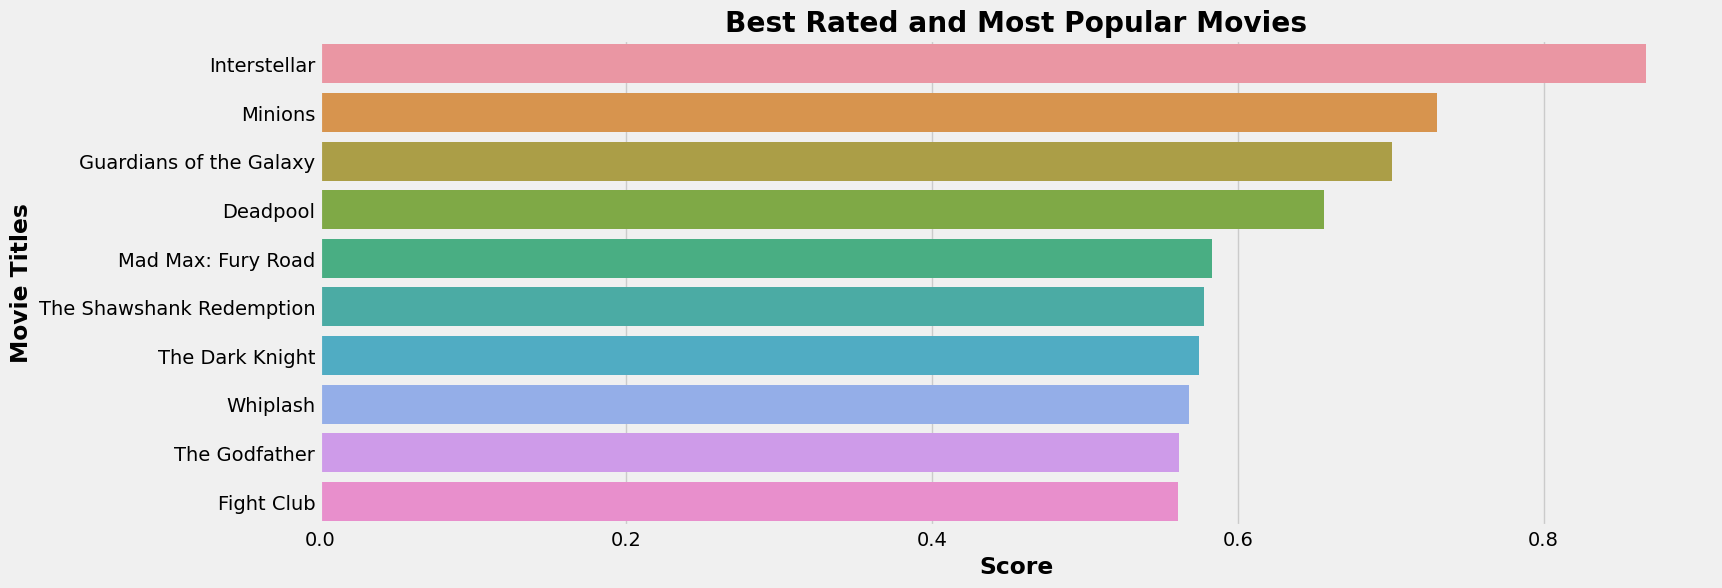

In [23]:
movies_score = tmdb.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)
plt.title("Best Rated and Most Popular Movies", weight="bold")
plt.xlabel("Score", weight="bold")
plt.ylabel("Movie Titles", weight="bold")
plt.show()